# Backprop guide: a backprop narrative

This was originally a guide for teaching week 5 of the Andrew Ng course, but it got out of control. The text is pretty long, but it has all my understanding of basic neural networks.

# Further reading

* Andrew Ng Machine Learning Coursera, [weeks 4 and 5](https://www.coursera.org/learn/machine-learning#syllabus)
* Elements of Statistical Learning: Chapter 11, Neural Networks ([get a copy](https://web.stanford.edu/~hastie/ElemStatLearn/))
* Computer Age Statistical Inference: Chapter 18, Neural Networks and Deep Learning (p. 351) ([get a copy](https://web.stanford.edu/~hastie/CASI/))
* [3Blue2Brown's neural network videos.](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)

# Introduction

## What this covers

This covers the classic neural network, called the mutli-layer perceptron model, the feed-forward model, or the densely-connected neural network. It is made of a network of units that process information together.

What's the point of the feed forward model? It acts like an overcharged logistic regression, powerful enough to do some basic machine learning tasks. It's a favourite project for beginners because of its basic construction.

The feed forward is related to the logistic regression, a model that classifies data into one of two classes. In fact, if you're already used to the idea of using a logistic regression to return true/false, you can think of the feed forward as a network of logistic regressions behaving like a digital computer.

![Regression Relation](Images/intro_logit_and_mlp.png "Regression Relation")

The downside of the feed forward model is its simplicity: it isn't spectacular on more interesting tasks, such as image classification and natural language processing. You could say it's a bit inflexible. As an added penalty on top of this inflexibility, the feed forward is a black box you can't look inside to see what's going on.

Here is a short glossary you can refer to if you run into unknown terms here or elsewhere:

* Model: a reproduction of a real-life phenomenom. A painter can paint a landscape and a writer can write a novel about it. If data is available for the phenomenom, a statistician can create a model of it, which behaves like the real thing but is only a reproduction.
* Loss, cost, objective function: how to measure error. For example, the mean-squared error treats error as the squared ($x^2$) difference between the modeled data and real data. Neural networks like these functions because they help the networks decide whether one error is not as bad as another error.
* Gradient descent: the mathematical technology used to train neural networks. Performing gradient descent once will reduce model error by a *very* small amount. Performing gradient descent thousands of times *usually* gives a well-trained neural network.
* Neuron, perceptron: neurons/perceptrons are the building blocks of the neural network. **Caution**: a perceptron looks identical to the logistic regression, but the two have different philosophies: perceptrons are used to train machines, logistic regressions are used for statistics.

# Deep dive

## The basic unit: the perceptron

The following diagram shows a perceptron.

![Just a lonely neuron](Images/intro_perceptron.png "Just a lonely neuron")

It's a building block that "learns" to return a true/false signal. The perceptron is a collections of parameters (synapses) and an activation function (sigmoid here). Data comes in and data comes out.

## Feed forward basics

A neural network is a stack of layers of perceptrons working together, and the term feed forward refers to "feeding" data through this network from start to finish. As you can see with the arbitrary example below, that can be a lot of feeding.

![A lot](Images/intro_ManyNeurons.png "A lot")

The diagram above is just to scare you. Neural networks typically have *a lot* more connections!

[*Drawn with this python script*](https://gist.github.com/craffel/2d727968c3aaebd10359#file-draw_neural_net-py)

We'll try to avoid these diagrams when we can. They can get very busy.

### Numpy importing

To get started, we'll need to import `numpy` to deal with all the matrices involved.

Each NN library you use will have a way of handling matrices. They tend to be similar and might even just work with `numpy` matrices seemlessly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Values flowing

In a neural network, values flow through layers of synapses and neurons. This is called feed-forward.

Everything is passed forward to whatever is down the line. A neuron like the one below feeds information to many other neurons in the network.

![Everything flows](Images/intro_perceptron_feed.png "Everything flows")

To feed-forward data through a neural network is to pass data through the network's weights and activation functions to create an output. The feed-forward receives its data at the input layer, a copy of the input. The activity begins at the first hidden layer, when the input signal is passed through synapses (weights), and adjusted (bias) and transformed (activation function) by the neuron. Here is what it does:

#### First hidden layer

1. Signal $x$ passing though weights $w_1$: $x \times w_1$
2. Signal adjusted by neuron bias $b_1$: $x \times w_1 + b_1 = z_1$
3. Signal shaped by activation function $\sigma$: $a_1 = \sigma(z_1)$
4. Signal ready for rest of network

Let's look at that more closely. The $w_1$ matrix (weights) is the collection of "synapses" of the "neurons": they are the connections the neurons use to pull in data. These synapses can be increased to amplify an incoming variable, set to zero to ignore one, or made negative to invert the inbound signal. During training they are tuned by the neurons to help the NN minimize prediction error.

The biases $b_1$ are unique to each neuron. They're used by the neuron to adjust what they receive.

The activation function $\sigma$, the sigmoid function, causes the neuron to output a binary signal. Unlike a digital computer though, the signal can range *between* 0 and 1 if the neuron is unsure.

When you look at the graph below, the result of the weights and bias applied to the data is the x-axis, and the resulting sigmoig signal is seen along the y-axis.

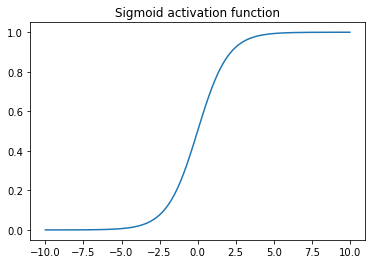

In [2]:
x=np.linspace(-10,10,100)
plt.plot(x,1/(1 + np.exp(-x)))
plt.title('Sigmoid activation function')
plt.show()

* Synapses strengthen or weaken incoming variables with their weights
* Biases adjust the sum of these weighted signals
* Neuron does a weighted sum of everything and transforms it with its activation function

#### A little taste of matrices

We'll look at this more closely next chapter.

The weights are matrices with dimensions $in \times out$, $in$ the size of the data coming in and $out$ the size of the data coming out. $out$ is the number of neurons in the layer, and $in$ is the amount of values each of these neurons is fed during feed-forward. The biases are $1 \times out$, one bias for each neuron.

![Dimensions](Images/intro_NeuronSimple.png "Dimensions")

Above you can see that the input data is 3 values and that each neuron has 3 synapses ($2 \times 3 = 6$ in total). There are 2 neurons in the layer and they produce 2 outputs, one each neuron. There are also 2 biases integrated inside the 2 neurons.

Each layer has only two quantities: how much comes in and how much goes out.

The first aspect of the feed-forward is then the flowing of data through weights, biases, and activation functions.

## Final point: the neural network as a function

A function is a mathematical invention that maps one space into another. The neural network is a function because it takes data from its inputs and transforms it into output data.

$$NN(x) = \hat{y}$$

People call neural networks "universal function approximators", meaning that if you made a neural network big enough it'd be able to recreate anything. You can see this below.

Let's set up a simple neural network:

$$NN(x) = \sigma( \sigma(x \cdot W_1 + b_1) \cdot W_{out} + b_{out} ) = \hat{y}$$

If you keep re-running the cell below, it'll keep coming up with weird functions.

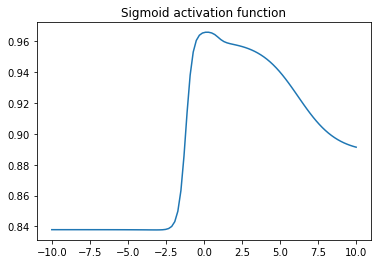

In [6]:
def sigmoid(x): return 1/(1 + np.exp(-x))

b1 = np.random.uniform(low=-5, high=5, size=(1,1)) # Bias: 1 x layer_1_size
w1 = np.random.uniform(low=-5, high=5, size=(1,3)) # Weight: input_vars x layer_1_size
b_out = np.random.uniform(low=-1, high=1, size=(1,1)) # Bias: 1 x output_size
w_out = np.random.uniform(low=-2, high=2, size=(3,1)) # Weight: layer_1_size x output_size

x = np.linspace(-10,10,100)
x_data = np.reshape(x, (100,1))
plt.plot(x, sigmoid(sigmoid(x_data.dot(w1) + b1).dot(w_out) + b_out) )
plt.title('Sigmoid activation function')
plt.show()

Actually, let me drive the point home by adding another hidden layer to the above and increasing the neuron count to 200+.

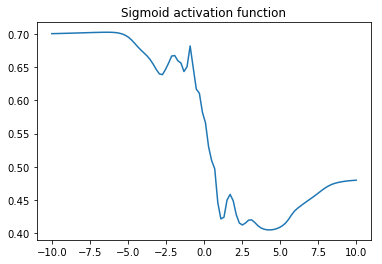

In [28]:
def sigmoid(x): return 1/(1 + np.exp(-x))

b1 = np.random.uniform(low=-10, high=10, size=(1,100)) # Bias: 1 x layer_1_size
w1 = np.random.uniform(low=-10, high=10, size=(1,100)) # Weight: input_vars x layer_1_size
b_2 = np.random.uniform(low=-10, high=10, size=(1,100)) # Bias: 1 x layer_2_size
w_2 = np.random.uniform(low=-10, high=10, size=(100,100)) # Weight: layer_1_size x layer_2_size
b_out = np.random.uniform(low=-0.1, high=0.1, size=(1,1)) # Bias: 1 x output_size
w_out = np.random.uniform(low=-0.1, high=0.1, size=(100,1)) # Weight: layer_2_size x output_size

x = np.linspace(-10,10,100)
x_data = np.reshape(x, (100,1))
plt.plot(x, sigmoid(sigmoid(sigmoid(x_data.dot(w1) + b1).dot(w_2) + b_2).dot(w_out) + b_out) )
plt.title('Sigmoid activation function')
plt.show()

To me the phrase "universal function approximator" doesn't mean a whole lot: I prefer the monicker *universal data approximator*. Neural networks are powerful enough that they can overfit a lot of data. Overfitting data means that the network is starting to memorize the data rather than trying to understand it.

If you want a silly analogy, overfitting is like trying to put a pair of skinny jeans after leg day at the gym. The extra blood and energy in your leg muscles are simply too much for those jeans, and you are forced to either put on a pair of jogging pants (get more data) or binge watch Netflix for a month so the muscles atrophy (known as *regularization*).

When we get a real network to play with, we'll see what happens when we add too much power to the neural network. You will see that the network is able to predict its training data at nearly 100% accuracy.